## Diplomado en Inteligencia Artificial y Aprendizaje profundo
#### Segmentación de imágenes satelitales 

**Zona de estudio**: Hayuelos

In [ ]:
!sudo apt-get install python-opencv
!sudo pip install --upgrade keras
!pip install --upgrade git+https://github.com/divamgupta/image-segmentation-keras

In [ ]:
import tensorflow

print(tensorflow.__version__)

2.4.1


In [72]:
from  tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping, CSVLogger, RemoteMonitor
from keras_segmentation.models.unet import vgg_unet, unet, mobilenet_unet
from keras_segmentation.models.fcn import fcn_32_vgg
import pandas as pd
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [45]:
## Define las ruras de directorios

path_gdrive = "/content/drive/MyDrive/Clases/Diplomado_AI&DL/Notebooks/proyecto_final/hayuelos/"
path_models = os.path.join(path_gdrive, "models")
path_imgtrain = os.path.join(path_gdrive, "img32_train")
path_imgtest = os.path.join(path_gdrive, "img32_test")
path_labelstrain = os.path.join(path_gdrive, "label32_train")
path_labelstest = os.path.join(path_gdrive, "label32_test")

512/512 [==============================] - 18s 36ms/step - loss: 7.5678e-04 - accuracy: 1.0000 - val_loss: 0.3151 - val_accuracy: 0.9292


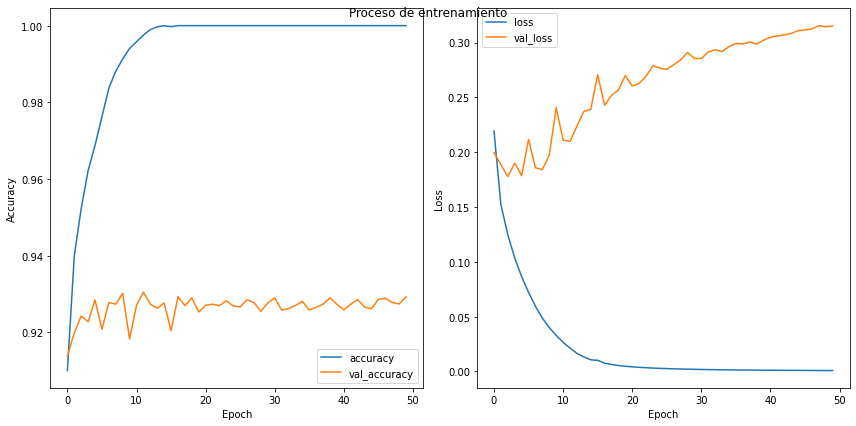

In [70]:
class plotCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
        plt.suptitle('Proceso de entrenamiento')
        history = pd.read_csv(os.path.join(path_models, "vgg_unet_3.csv"))
        history[['accuracy', 'val_accuracy']].plot(ylabel='Accuracy', ax=ax1, xlabel='Epoch')
        history[['loss', 'val_loss']].plot(ylabel='Loss', ax=ax2, xlabel='Epoch')
        plt.tight_layout()
        plt.show()
    
callbacks = [
    CSVLogger(os.path.join(path_models, "vgg_unet_3.csv"), separator=",", append=False),
    ModelCheckpoint(
      os.path.join(path_models, 'vgg_unet_3.h5'), monitor='val_loss', verbose=0, save_best_only=False,
      save_weights_only=False, mode='auto', save_freq='epoch', options=None
    ),
    plotCallback()
]

def image_preprocessing(image):
    image = image.astype('float32') / 255.0
    return image

model = vgg_unet(n_classes=2,  input_height=32, input_width=32, channels=3)

history = model.train(
    train_images =  path_imgtrain,
    train_annotations = path_labelstrain,
    validate=True,  optimizer_name = "sgd",
    do_augment=False,
    val_images =  path_imgtest,
    val_annotations = path_labelstest,
    checkpoints_path = os.path.join(path_models,"vgg_unet_3"), 
    epochs=50, callbacks=callbacks
)

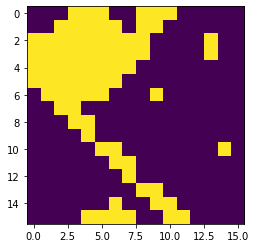

In [76]:
out = model.predict_segmentation(
    inp=os.path.join(path_imgtest, "grilla_46.png"),
    out_fname=os.path.join(path_gdrive, "grilla_46.png")
)

import matplotlib.pyplot as plt
plt.imshow(out)

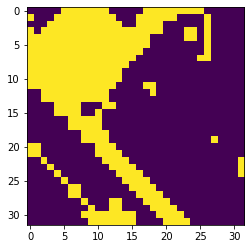

In [77]:
imglabel = mpimg.imread(os.path.join(path_labelstest, "grilla_46.png"))
plt.imshow(imglabel)

In [58]:
for filename in glob.glob(os.path.join(path_imgtrain, '*.png')):
  img = os.path.basename(filename)
  out = model.predict_segmentation(
    inp=os.path.join(path_imgtrain, img),
    out_fname=os.path.join(path_gdrive, "predicts", img)
  )
  print("Predicción de la imagen: ", img)

Predicción de la imagen:  grilla_3.png
Predicción de la imagen:  grilla_40.png
Predicción de la imagen:  grilla_24.png
Predicción de la imagen:  grilla_29.png
Predicción de la imagen:  grilla_14.png
Predicción de la imagen:  grilla_4.png
Predicción de la imagen:  grilla_31.png
Predicción de la imagen:  grilla_0.png
Predicción de la imagen:  grilla_32.png
Predicción de la imagen:  grilla_20.png
Predicción de la imagen:  grilla_5.png
Predicción de la imagen:  grilla_35.png
Predicción de la imagen:  grilla_25.png
Predicción de la imagen:  grilla_26.png
Predicción de la imagen:  grilla_41.png
Predicción de la imagen:  grilla_16.png
Predicción de la imagen:  grilla_13.png
Predicción de la imagen:  grilla_34.png
Predicción de la imagen:  grilla_28.png
Predicción de la imagen:  grilla_43.png
Predicción de la imagen:  grilla_15.png
Predicción de la imagen:  grilla_42.png
Predicción de la imagen:  grilla_38.png
Predicción de la imagen:  grilla_45.png
Predicción de la imagen:  grilla_12.png
Pred

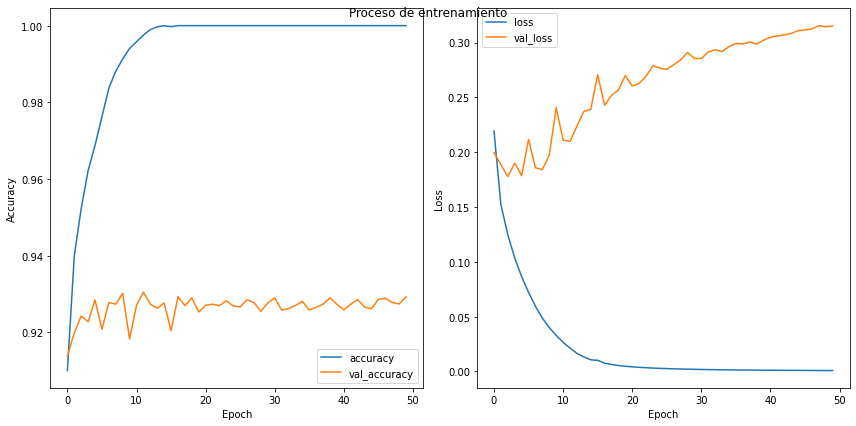

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.suptitle('Proceso de entrenamiento')
history1 = pd.read_csv(os.path.join(path_models, "vgg_unet_3.csv"))
history1[['accuracy', 'val_accuracy']].plot(ylabel='Accuracy', ax=ax1, xlabel='Epoch')
history1[['loss', 'val_loss']].plot(ylabel='Loss', ax=ax2, xlabel='Epoch')
plt.tight_layout()
plt.show()

In [79]:
# evaluating the model 
print(model.evaluate_segmentation( inp_images_dir=path_imgtest  , annotations_dir=path_labelstest))

10it [00:00, 24.62it/s]

{'frequency_weighted_IU': 0.8686058597955282, 'mean_IU': 0.8529457620768472, 'class_wise_IU': array([0.89988938, 0.80600214])}
